##### <center> MINISTERE DE L’ENSEIGNEMENT SUPERIEUR  ET DE LA RECHERCHE SCIENTIFIQUE <br/> UNIVERSITE DE SOUSSE </center>

 

### <center>Institut Supérieur d’Informatique et de Technique de Communication </center>           <img src="isitcom.png"> 
### <center>المعهد العالي للإعلامية و تقنيات الاتصال بحمام سوسة</center>

 

## <center> <div style="background-color:lavender;color:steelBlue;padding:1%;text-decoration: underline;"><font style="font-family:italic;" size="12" >Analyse numérique</div> 

 

# <center> <div style="text-decoration: underline;"><font size="5" >TP3: intégration numérique</div> 
    

 

###  <center> Réalisé par : <br> Marghli Nourhene <br> 2DNI1  <center> <hr>

 

#### <center> Année Universitaire 2021 – 2022 <center>

In [1]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
f=lambda x:1/(1+x**2)

#  <font color="EC4A60"/> Méthode des rectangles:

In [30]:
class RectangleG ( object ) :
    def __init__ (self , a , b , n , f ) : #initialisation de la classe : c'est un constructeur prédéfini
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate ( self , f ) : #méthode pour calculer la valeur de l'intégrale selon la formule des rectangles
        x= self.x
        y= f( x )
        h = float( x[1] - x[0] ) #pour calculer la valeur du pas
        s = sum( y[ 0 : -1 ] ) 
        return h * s
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( 'x' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des rectangles gauches' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

    

In [11]:
R=RectangleG(-1,1,5,f)

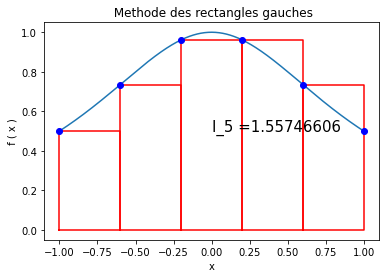

In [12]:
R.Graph(f)

Pour la méthode des rectangles: 

-on a donné la fonction $f$ avec un intervalle donné et le nombre de subdivisions $n$

-on récupère par la suite la fonction f avec le calcul d'intégrale,la valeur approchée de l'intégrale et le graphe résultant les rectangles ainsi la valeur de l'intégrale approché
    

#  <font color="EC4A60"/> Méthode des trapèzes:

In [18]:
class Trapezoidal(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des Trapèzes' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [19]:
@widgets.interact_manual( 
            color=['blue', 'red', 'green'],
            a = widgets.IntSlider(min=-1, max=10, value=1, description='a:'),
            b = widgets.IntSlider(min=-2, max=5, value=0, description='b:'),
            n=widgets.IntSlider(min=1, max=50, step=5,value=10,description='n:'),
            f={
                 '1/(1+x**2)': lambda x:1/(1+x**2), 
                  'sin(x)': lambda x:sin(x),
                  'cos(x)': lambda x:cos(x),
                   'x**2-x+5': lambda x:x**2-x+5
                                        }
                   )
def plot(a=-1, f='1/(1+x**2)',b=1,n=4, grid=True,color='red'):
    S = Trapezoidal(a, b, n, f)

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    
    ax.grid(grid)
    return S.Graph(f)

interactive(children=(IntSlider(value=1, description='a:', max=10, min=-1), Dropdown(description='f', options=…

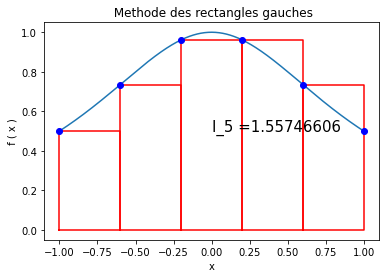

In [20]:
def simul(n,f):
    R=RectangleG(-1,1,n,f)
    return R.Graph(f)
simul(5,f)

In [21]:
interact (simul, n=widgets.IntSlider(
    min=1, max=50, step=5,value=10), f={'1/(1+x**2)': lambda x:1/(1+x**2), 
                                        'sin(x)': lambda x:sin(x),'cos(x)': lambda x:cos(x),'x**2-x+5': lambda x:x**2-x+5})

NameError: name 'interact' is not defined

#  <font color="EC4A60"/> Méthode de Simpson:

In [22]:
class Simpson(object):
    def __init__(self, a, b, n, f): 
        self.a = a
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n 

    def integrate(self,f):
        x=self.x 
        y=f(x) 
        h = float(x[1] - x[0])
        n = len(x) - 1
        if n % 2 == 1:
            n -= 1
        s = y[0] + y[n] + 4.0 * sum(y[1:-1:2]) + 2.0 * sum(y[2:-2:2])
        
        
        return h * s / 3.0
    def Graph(self,f,resolution=1001):
        xl = self.x 
        yl = f(xl) 
        xlist_fine=np.linspace(self.a, self.b, resolution)
     
        for i in range(self.n):
            xx=np.linspace(xl[i], xl[i+1], resolution)
            m=(xl[i]+xl[i+1])/2
            a=xl[i]
            b=xl[i+1]
            l0 = (xx-m)/(a-m)*(xx-b)/(a-b)
            l1 = (xx-a)/(m-a)*(xx-b)/(m-b)
            l2 = (xx-a)/(b-a)*(xx-m)/(b-m)
            P = f(a)*l0 + f(m)*l1 + f(b)*l2
            plt.plot(xx,P,'m')
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine,'g')
        plt.plot(xl, yl,'wp')
        
        plt.ylabel('f(x)')
        plt.title('Simpson')

In [23]:
@widgets.interact_manual( 
            color=['blue', 'red', 'green'],
            a = widgets.IntSlider(min=-1, max=10, value=1, description='a:'),
            b = widgets.IntSlider(min=-2, max=5, value=0, description='b:'),
            n=widgets.IntSlider(min=1, max=50, step=5,value=10,description='n:'),
            f={
                 '1/(1+x**2)': lambda x:1/(1+x**2), 
                  'sin(x)': lambda x:sin(x),
                  'cos(x)': lambda x:cos(x),
                   'x**2-x+5': lambda x:x**2-x+5
                                        }
                   )
def plot(a=-1, f='1/(1+x**2)',b=1,n=4, grid=True,color='red'):
    S = Simpson(a, b, n, f)

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    
    ax.grid(grid)
    return S.Graph(f)

interactive(children=(IntSlider(value=1, description='a:', max=10, min=-1), Dropdown(description='f', options=…

In [24]:
def sim(n,f):
    R=RectangleG(-1,1,n,f)
    T=Trapezoidal(-1,1,n,f)
    fig=plt.figure(figsize=(12,2))
    plt.subplot(121)
    R.Graph(f)
    plt.subplot(122)
    T.Graph(f)
    plt.show()

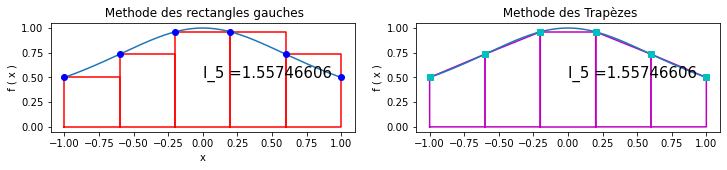

In [25]:
sim(5,f)

In [26]:
interact (sim, n=widgets.IntSlider(
    min=1, max=50, step=5,value=10), f={'1/(1+x**2)': lambda x:1/(1+x**2), 
                                        'sin(x)': lambda x:sin(x),'cos(x)': lambda x:cos(x),'x**2-x+5': lambda x:x**2-x+5})

NameError: name 'interact' is not defined

In [27]:
class Milieu1(object):  
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x# contiens les xi
        h = float(x[1] - x[0])
        s=0
        for i in range(self.n):
            s=s+f((x[i]+x[i+1])*0.5)
        return h*s
       
    def Graph(self,f,resolution=1001):

        xl = self.x
        yl=f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)

       
        
        for i in range(self.n):
            
            m=(xl[i]+xl[i+1])/2
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] 
            y_rect = [0   , f(m), f(m)  , 0     , 0   ] 

            
            plt.plot(x_rect, y_rect,"b")
            yflist_fine = f(xlist_fine)
            plt.plot(xlist_fine, yflist_fine)
            plt.plot(m,f(m),"y*")
            plt.xlabel('x')
            plt.ylabel('f(x)')
            plt.title('Milieu')

No handles with labels found to put in legend.


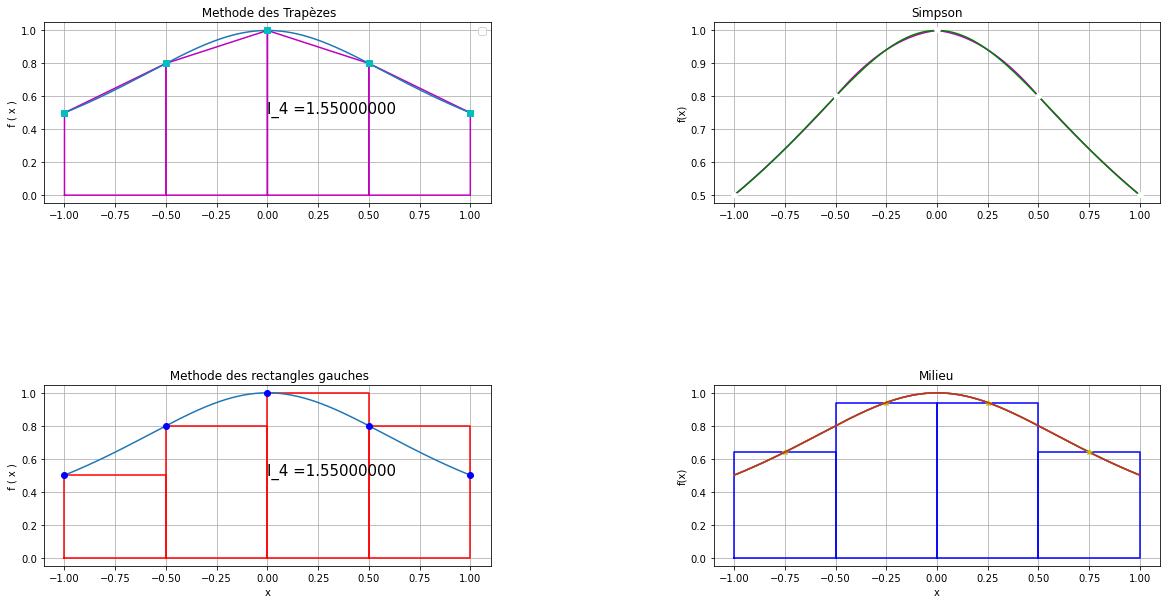

In [28]:
def simulataion(n,f):
    R=RectangleG(-1,1,n,f)
    T=Trapezoidal(-1,1,n,f)
    S=Simpson(-1,1,n,f)
    M=Milieu1(-1,1,n,f)
    fig=plt.figure(figsize = (20, 10))
    plt.gcf().subplots_adjust( wspace = 0.5, hspace = 1)
    ax = fig.add_subplot(221) 
    ax.grid()
    ax.legend(loc=1)
    T.Graph(f) 
    
    ax = fig.add_subplot(222)
    ax.grid()
    S.Graph(f)
    
    ax = fig.add_subplot(223)
    ax.grid()
    R.Graph(f)
    
    ax = fig.add_subplot(224)
    ax.grid()
    M.Graph(f)  
    plt.show()  
simulataion(4,f)

Button(description='Plot', style=ButtonStyle())

Output()

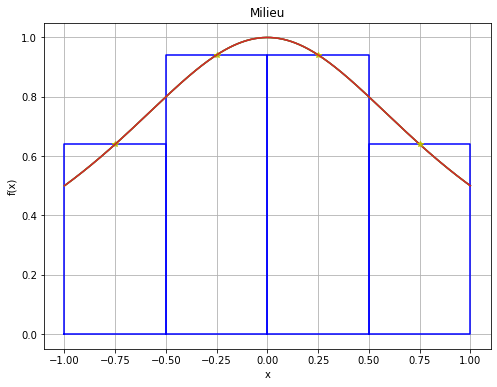

In [29]:
from IPython.display import display
button = widgets.Button(description="Plot")
output = widgets.Output()
M=Milieu1(-1,1,4,f)
display(button, output)
f=lambda x:1/(1+x**2)
def on_button_clicked(b):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.grid()
    return M.Graph(f)

button.on_click(on_button_clicked)